In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
Data = pd.read_csv("data/Telco.csv")

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

display(Data.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
processed_df = Data.copy()

In [5]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(processed_df,test_size=0.2,random_state=0)
train_df = train_df.reset_index().drop('index',axis=1) 
test_df = test_df.reset_index().drop('index',axis=1) 
print(len(processed_df))
print(len(train_df))
print(len(test_df))

7043
5634
1409


In [6]:
### Check base train_df

In [7]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9453-PATOS,Female,0,Yes,No,72,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,85.10,6155.4,No
1,8648-PFRMP,Female,1,No,No,14,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,46.35,672.7,No
2,7711-GQBZC,Female,0,Yes,Yes,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.70,1810.55,No
3,6289-CPNLD,Male,0,Yes,Yes,33,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,73.90,2405.05,Yes
4,6845-RGTYS,Female,0,Yes,No,47,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,98.75,4533.7,Yes


In [8]:
print("No of Churn :", (train_df["Churn"] == "No").sum())
print("Yes of Churn :", (train_df["Churn"] == "Yes").sum())
print("Yes ratio of Churn :", (train_df["Churn"] == "Yes").sum() / len(train_df["Churn"]))

No of Churn : 4133
Yes of Churn : 1501
Yes ratio of Churn : 0.26641817536386225


In [9]:
### Check basic infomation

In [10]:
train_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.162052,32.377352,64.834292
std,0.368531,24.573875,30.063617
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.712500
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.887500
max,1.000000,72.000000,118.750000


In [11]:
train_df.describe(include=['O']) # 숫자가 아닌 형태의 데이터들에 대한 정보를 출력

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634
unique,5634,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5277,2
top,9847-HNVGP,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,2817,2907,3949,5092,2720,2486,2793,2461,2472,2802,2227,2221,3113,3358,1896,8,4133


In [12]:
### Check missing data

In [13]:
Data["TotalCharges"].value_counts()

20.2       11
           11
19.75       9
19.9        8
19.65       8
20.05       8
45.3        7
19.55       7
20.15       6
19.45       6
20.25       6
20.3        5
20.45       5
44.4        4
20.35       4
19.95       4
69.95       4
50.15       4
49.9        4
70.6        4
69.65       4
44          4
20.5        4
19.4        4
69.6        4
19.85       4
19.2        4
69.9        4
74.7        4
75.3        4
19.5        4
19.3        4
20.4        4
50.75       3
70.45       3
50.45       3
84.5        3
86.05       3
74.3        3
55.7        3
70.15       3
70.3        3
45.1        3
24.4        3
19.1        3
50.6        3
305.55      3
70.1        3
69.25       3
85.5        3
35.9        3
74.6        3
74.9        3
69.1        3
79.55       3
19.25       3
24.8        3
74.35       3
44.75       3
20          3
69.55       3
1284.2      3
45.85       3
470.2       3
20.9        3
220.45      3
20.1        3
20.55       3
80.55       3
85          3
25.25       3
383.65

In [14]:
(Data["TotalCharges"] == ' ').sum()

11

In [15]:
object_column_names = [key for key in dict(Data.dtypes) if dict(Data.dtypes)[key] in ['object']]
object_column_names

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [16]:
object_column_names[0]

'customerID'

In [17]:
if (test_df[object_column_names[16]] == ' ').sum() >0:
    print("something wrong" ,(test_df[object_column_names[16]] == ' ').sum())
else:
    print("ok")

something wrong 3


In [18]:
for i in range(0, len(object_column_names)):
    if (Data[object_column_names[i]] == ' ').sum()>0:
        print(object_column_names[i]," - " ,(Data[object_column_names[i]] == ' ').sum())
    else:
        print("ok")

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
TotalCharges  -  11
ok


In [19]:
### Check basic infomation

In [20]:
Corr_mat = train_df.corr()
Corr_mat

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.024983,0.221910
tenure,0.024983,1.000000,0.250329
MonthlyCharges,0.221910,0.250329,1.000000


In [21]:
for name in train_df.columns:
    print(name ,"-",train_df[name].unique())

customerID - ['9453-PATOS' '8648-PFRMP' '7711-GQBZC' ... '6625-FLENO' '5539-TMZLF'
 '9929-PLVPA']
gender - ['Female' 'Male']
SeniorCitizen - [0 1]
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
tenure - [72 14 71 33 47 22 52 15  1 11 68 12 65  5 42  8 45 70 56 54  4 10 21  2
 61 13 25 30 18 64  6 37 41 62 31 63 24 23 43 58 35 50 69 60 44  3 34 17
 16 36 67 66 55 59 38 46 20 53 19  7 57 40 32  9 49 28 26 27 39 51 48 29
  0]
PhoneService - ['Yes' 'No']
MultipleLines - ['No' 'No phone service' 'Yes']
InternetService - ['DSL' 'No' 'Fiber optic']
OnlineSecurity - ['Yes' 'No' 'No internet service']
OnlineBackup - ['Yes' 'No' 'No internet service']
DeviceProtection - ['Yes' 'No' 'No internet service']
TechSupport - ['Yes' 'No' 'No internet service']
StreamingTV - ['Yes' 'No internet service' 'No']
StreamingMovies - ['Yes' 'No internet service' 'No']
Contract - ['Two year' 'Month-to-month' 'One year']
PaperlessBilling - ['No' 'Yes']
PaymentMethod - ['Mailed check' 'Electronic check' 'Bank tr

In [22]:
### check each feature's relationship with Churn

In [23]:
## make churn's new variable

In [24]:
yes_of_churn = (train_df['Churn'] == 'Yes')
no_of_churn = (train_df['Churn'] == 'No')

print('yes_of_churn :', yes_of_churn.sum())
print('no_of_churn :', no_of_churn.sum())

yes_of_churn : 1501
no_of_churn : 4133


In [25]:
yes_per_churn = yes_of_churn.sum() / len(train_df['Churn'])

print('yes_per_churn : ', yes_per_churn)

yes_per_churn :  0.26641817536386225


In [26]:
## using churn, chage object to int

In [27]:
from sklearn import preprocessing

eg_df = train_df.copy()
le = preprocessing.LabelEncoder()

eg_df['Churn'] = le.fit_transform(eg_df['Churn'])

In [28]:
eg_df.head()
# No - > 0
# Yes -> 1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9453-PATOS,Female,0,Yes,No,72,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,85.10,6155.4,0
1,8648-PFRMP,Female,1,No,No,14,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,46.35,672.7,0
2,7711-GQBZC,Female,0,Yes,Yes,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.70,1810.55,0
3,6289-CPNLD,Male,0,Yes,Yes,33,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,73.90,2405.05,1
4,6845-RGTYS,Female,0,Yes,No,47,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,98.75,4533.7,1


In [29]:
eg_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.162052,32.377352,64.834292,0.266418
std,0.368531,24.573875,30.063617,0.442125
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.712500,0.000000
50%,0.000000,29.000000,70.400000,0.000000
75%,0.000000,56.000000,89.887500,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [30]:
corr_mat = eg_df.corr()
corr_mat

,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.024983,0.221910,0.151184
tenure,0.024983,1.000000,0.250329,-0.362305
MonthlyCharges,0.221910,0.250329,1.000000,0.190375
Churn,0.151184,-0.362305,0.190375,1.000000


In [31]:
number_of_female = (eg_df['gender'] == "Female")
number_of_male =  (eg_df['gender'] == "Male")

print("Femal :", number_of_female.sum())
print("Male : ", number_of_male.sum())

Femal : 2817
Male :  2817


In [32]:
# check relationship using groupby method (object)
# gender

In [33]:
class_gender = eg_df.groupby('gender').mean()
class_gender

,SeniorCitizen,tenure,MonthlyCharges,Churn
gender,,,,
Female,0.163294,32.325524,65.385978,0.272985
Male,0.160809,32.429180,64.282606,0.259851


In [34]:
class_gender['Churn']

gender
Female    0.272985
Male      0.259851
Name: Churn, dtype: float64

Text(0,0.5,'Churn')

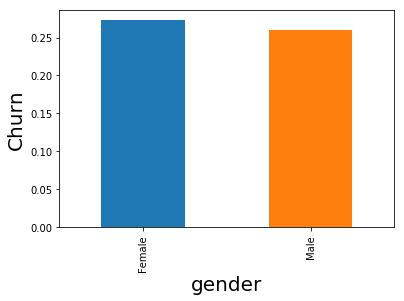

In [35]:
class_gender['Churn'].plot.bar()

plt.xlabel('gender', size = 20)
plt.ylabel('Churn', size = 20)

In [36]:
# - gender와 churn은 상관관계가 적다.

In [37]:
class_senior = eg_df.groupby('SeniorCitizen').mean()
class_senior

,tenure,MonthlyCharges,Churn
SeniorCitizen,,,
0,32.107393,61.90071,0.237026
1,33.773275,80.00345,0.418401


In [38]:
(eg_df['SeniorCitizen'] == 1).sum()

913

In [39]:
class_senior['Churn']

SeniorCitizen
0    0.237026
1    0.418401
Name: Churn, dtype: float64

Text(0,0.5,'Churn')

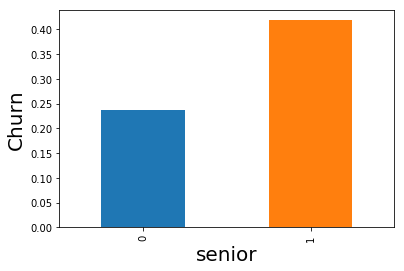

In [40]:
class_senior['Churn'].plot.bar()

plt.xlabel('senior', size = 20)
plt.ylabel('Churn', size = 20)

In [41]:
# - 1,0의 차이가 있다고 보여짐

In [43]:
object_column_names = [key for key in dict(eg_df.dtypes) if dict(eg_df.dtypes)[key] in ['object']]
object_column_names

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [44]:
del object_column_names[0]

In [45]:
object_column_names.remove('TotalCharges')

In [46]:
object_column_names

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

gender
Female    0.272985
Male      0.259851
Name: Churn, dtype: float64


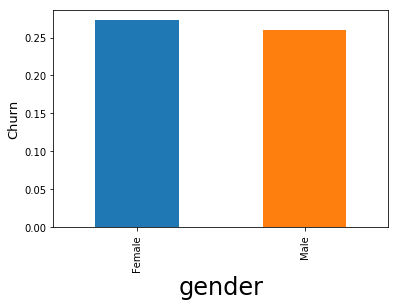

Partner
No     0.330581
Yes    0.198020
Name: Churn, dtype: float64


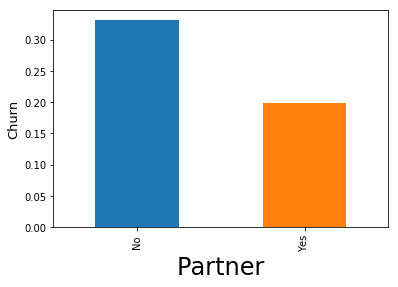

Dependents
No     0.315016
Yes    0.152522
Name: Churn, dtype: float64


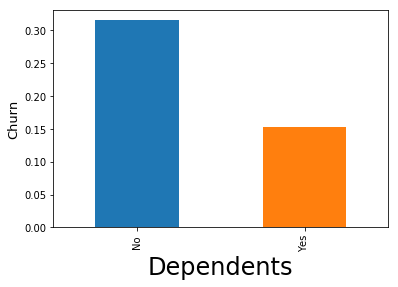

PhoneService
No     0.241697
Yes    0.269049
Name: Churn, dtype: float64


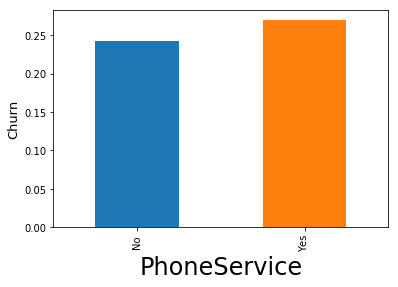

MultipleLines
No                  0.251103
No phone service    0.241697
Yes                 0.289629
Name: Churn, dtype: float64


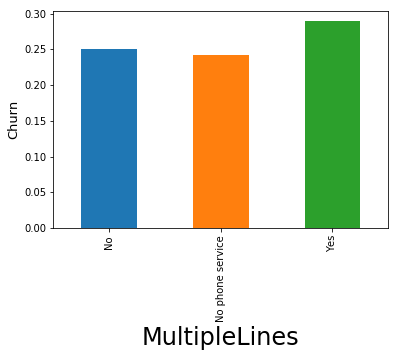

InternetService
DSL            0.187435
Fiber optic    0.419952
No             0.078560
Name: Churn, dtype: float64


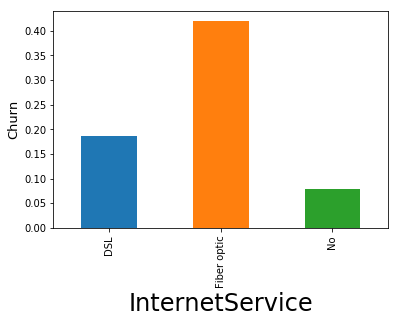

OnlineSecurity
No                     0.417114
No internet service    0.078560
Yes                    0.148240
Name: Churn, dtype: float64


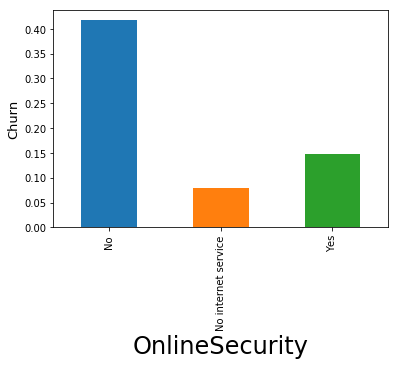

OnlineBackup
No                     0.409183
No internet service    0.078560
Yes                    0.203998
Name: Churn, dtype: float64


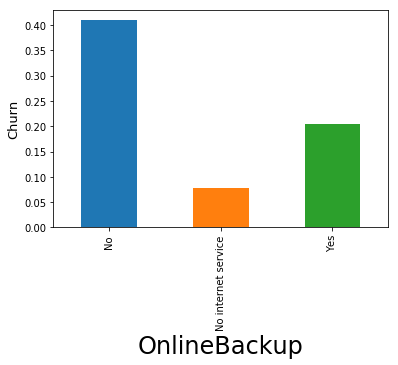

DeviceProtection
No                     0.392799
No internet service    0.078560
Yes                    0.223711
Name: Churn, dtype: float64


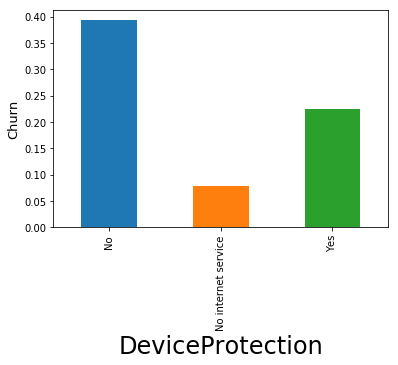

TechSupport
No                     0.416488
No internet service    0.078560
Yes                    0.147826
Name: Churn, dtype: float64


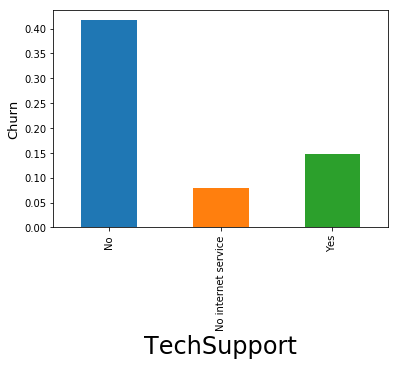

StreamingTV
No                     0.334531
No internet service    0.078560
Yes                    0.302059
Name: Churn, dtype: float64


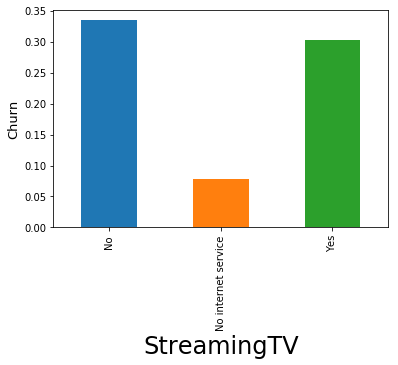

StreamingMovies
No                     0.342638
No internet service    0.078560
Yes                    0.293930
Name: Churn, dtype: float64


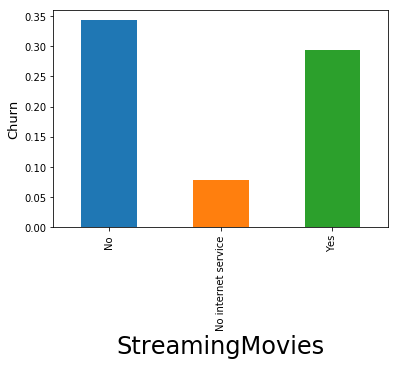

Contract
Month-to-month    0.430774
One year          0.102954
Two year          0.028443
Name: Churn, dtype: float64


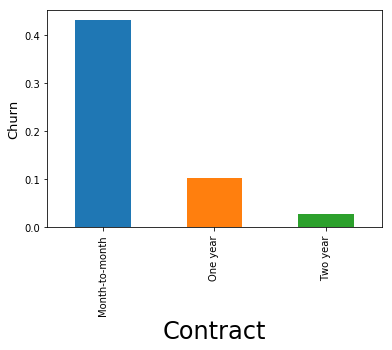

PaperlessBilling
No     0.163884
Yes    0.335914
Name: Churn, dtype: float64


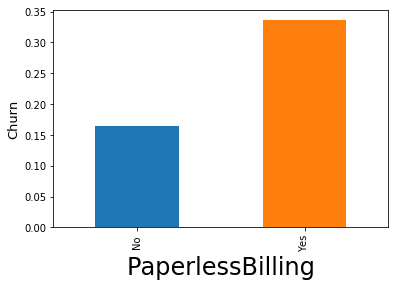

PaymentMethod
Bank transfer (automatic)    0.162903
Credit card (automatic)      0.144054
Electronic check             0.459916
Mailed check                 0.195552
Name: Churn, dtype: float64


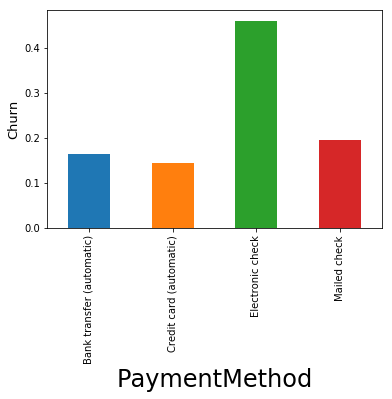

In [47]:
for name in object_column_names:
    ob_churn = eg_df.groupby(name).mean()
    
    print(ob_churn['Churn'])
    ob_churn['Churn'].plot.bar()
    plt.xlabel(name , size = 24)
    plt.ylabel('Churn', size = 13)
    plt.show()

값들 관의 관계가

'gender' 
'Partner' - 유의미
'Dependents' - 유의미
'PhoneService'
'MultipleLines' - 애매
'InternetService' - 유의미
'OnlineSecurity' - 유의미
'OnlineBackup' - 유의미
'DeviceProtection' - 유의미
'TechSupport' - 유의미
'StreamingTV' - 유의미
'StreamingMovies' - 유의미
'Contract' - 유의미
'PaperlessBilling' - 유의미
'PaymentMethod' - 유의미


In [48]:
phone_and_internet = eg_df.groupby(['PhoneService', 'InternetService']).mean()
phone_and_internet

SeniorCitizen     tenure  MonthlyCharges  \
PhoneService InternetService                                             
No           DSL                   0.154982  32.470480       42.292251   
Yes          DSL                   0.088150  33.684249       64.536705   
             Fiber optic           0.267900  32.758648       91.423753   
             No                    0.033552  30.080196       21.076718   

                                 Churn  
PhoneService InternetService            
No           DSL              0.241697  
Yes          DSL              0.166185  
             Fiber optic      0.419952  
             No               0.078560

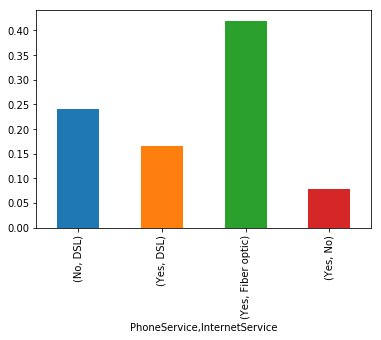

In [49]:
phone_and_internet['Churn'].plot.bar()

# 폰서비스를 안쓰는 사람은 무조건 인터넷은 DSL을 쓴다.

In [50]:
(eg_df['PhoneService'] == 'No').sum()

542

In [51]:
(eg_df['InternetService'] == 'DSL').sum()

1926

In [52]:
# 폰 서비스를 안쓰는 사람은 다 DSL만 쓰는데 그럼 돌려서 얘기하면
# 폰 서비스라는 feature는 DSL에 관한 정보를 꽤 담고 있는 것 같다.

In [53]:
# 폰서비스만 쓰는 사람, 인터넷만 쓰는 사람, 둘 다 쓰는 사람 churn 비교

In [54]:
only_phone = (eg_df['PhoneService'] == 'Yes') & (eg_df['InternetService'] == 'No')
only_internet = (eg_df['PhoneService'] == 'No') & (eg_df['InternetService'] != 'No')
both = (eg_df['PhoneService'] == 'Yes') & (eg_df['InternetService'] != 'No')

In [55]:
print('only_phone :', only_phone.sum())
print('only_internet :',only_internet.sum())
print('both :',both.sum())

print('total :',only_phone.sum() + only_internet.sum() + both.sum())

only_phone : 1222
only_internet : 542
both : 3870
total : 5634


In [56]:
group_only_phone = eg_df.groupby(only_phone).mean()
group_only_phone

,SeniorCitizen,tenure,MonthlyCharges,Churn
False,0.197643,33.013599,76.953910,0.31845
True,0.033552,30.080196,21.076718,0.07856


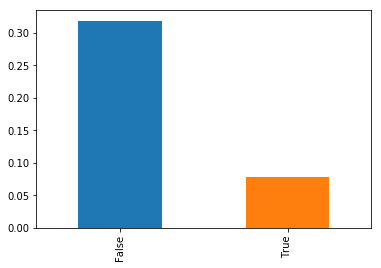

In [57]:
group_only_phone['Churn'].plot.bar()

In [58]:
group_only_internet = eg_df.groupby(only_internet).mean()
group_only_internet

,SeniorCitizen,tenure,MonthlyCharges,Churn
False,0.162804,32.367439,67.233700,0.269049
True,0.154982,32.470480,42.292251,0.241697


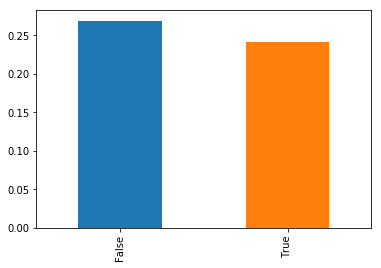

In [59]:
group_only_internet['Churn'].plot.bar()

In [60]:
group_both = eg_df.groupby(both).mean()
group_both

,SeniorCitizen,tenure,MonthlyCharges,Churn
False,0.070862,30.814626,27.595323,0.128685
True,0.203618,33.089664,81.808333,0.329199


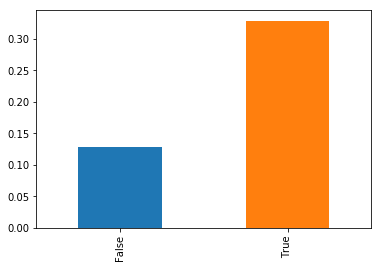

In [61]:
group_both['Churn'].plot.bar()

In [62]:
# 하나의 서비스만 쓰는 사람이 더 관계를 잘 유지한다.
# 그 중에서도 전화만 쓰는 사람이 더 관계를 잘 유지한다.

In [63]:
gender_partner_dependents = eg_df.groupby(['gender', 'Partner', 'Dependents']).mean()
gender_partner_dependents

SeniorCitizen     tenure  MonthlyCharges     Churn
gender Partner Dependents                                                    
Female No      No               0.195213  23.450262       64.842895  0.358265
               Yes              0.008547  21.273504       54.822222  0.239316
       Yes     No               0.254237  43.223421       73.970185  0.246533
               Yes              0.046218  40.850140       60.331232  0.142857
Male   No      No               0.150899  23.111024       61.192572  0.327600
               Yes              0.022989  25.672414       50.331897  0.201149
       Yes     No               0.324561  42.605263       75.720468  0.271930
               Yes              0.050000  41.448529       62.159191  0.135294

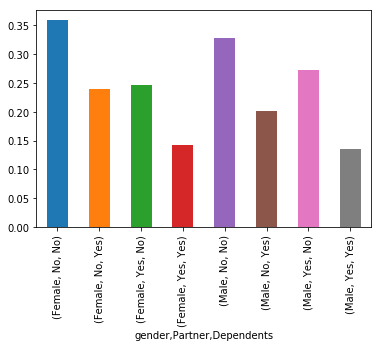

In [64]:
gender_partner_dependents['Churn'].plot.bar()

In [65]:
# - 성별보다는 가족이 있냐 없냐가 더 중요한듯.

In [66]:
gender_service = eg_df.groupby(['gender', 'PhoneService', 'InternetService']).mean()
gender_service

SeniorCitizen     tenure  MonthlyCharges  \
gender PhoneService InternetService                                             
Female No           DSL                   0.142308  31.123077       43.178846   
       Yes          DSL                   0.084195  34.327917       65.115731   
                    Fiber optic           0.273800  32.213218       91.283950   
                    No                    0.029557  30.847291       21.117488   
Male   No           DSL                   0.166667  33.712766       41.474823   
       Yes          DSL                   0.091938  33.067893       63.982249   
                    Fiber optic           0.261728  33.329218       91.570000   
                    No                    0.037520  29.318108       21.036215   

                                        Churn  
gender PhoneService InternetService            
Female No           DSL              0.238462  
       Yes          DSL              0.161004  
                    Fiber optic      0.431943  
                    No               0.080460  
Male   No           DSL              0.244681  
       Yes          DSL              0.171146  
                    Fiber optic      0.407407  
                    No               0.076672

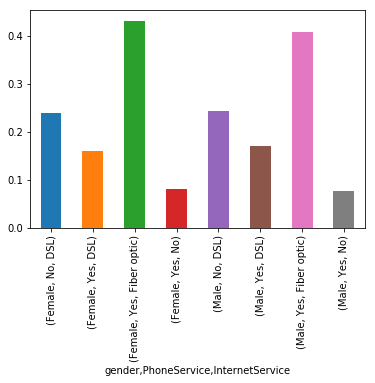

In [67]:
gender_service['Churn'].plot.bar()

In [69]:
# 어찌됐든 가족이 있으면 해지율이 낮아진다.

In [70]:
# partner와 dependents를 합해서 family를 만들어 보자

In [71]:
eg_df['Family'] = eg_df['Partner'] + eg_df['Dependents']

In [72]:
eg_df.loc[eg_df["Family"].str.contains('NoNo',regex=True,na=False),"HaveFamily"] = 0
eg_df["HaveFamily"].fillna(1, inplace=True)

In [73]:
eg_df[['Partner', 'Dependents','Family', 'HaveFamily']][:5]

,Partner,Dependents,Family,HaveFamily
0,Yes,No,YesNo,1.0
1,No,No,NoNo,0.0
2,Yes,Yes,YesYes,1.0
3,Yes,Yes,YesYes,1.0
4,Yes,No,YesNo,1.0


In [74]:
HaveFamily_number = eg_df['HaveFamily'].sum()
HaveFamily_number

3018.0

In [75]:
# 가족에 따라 인터넷 서비스, 폰 서비스 어떻게 쓰는지 보자

In [76]:
famliy_use_internet = (eg_df['HaveFamily'] == 1.0) & (eg_df['InternetService'] != 'No')
nofamliy_use_internet = (eg_df['HaveFamily'] == 0.0) & (eg_df['InternetService'] != 'No')

famliy_use_phone = (eg_df['HaveFamily'] == 1.0) & (eg_df['PhoneService'] == 'Yes')
nofamily_use_phone = (eg_df['HaveFamily'] == 0.0) & (eg_df['PhoneService'] == 'Yes')

print(famliy_use_internet.sum())
print(nofamliy_use_internet.sum())
print(famliy_use_phone.sum())
print(nofamily_use_phone.sum())

2340
2072
2727
2365


In [77]:
# 가족이 있을 수록 인터넷이나 폰 서비스를 쓰는 사람이 많다.

In [78]:
eg_df[['InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']][:20]

# 하나의 feature에 No internet service가 있으면 다른 feature에도 No internet service이다.

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,Yes,Yes,Yes,Yes,Yes,Yes
1,DSL,No,No,No,No,Yes,Yes
2,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3,DSL,No,No,Yes,Yes,Yes,Yes
4,Fiber optic,Yes,Yes,Yes,No,Yes,No
5,Fiber optic,No,No,No,No,Yes,No
6,Fiber optic,No,Yes,No,No,Yes,Yes
7,Fiber optic,Yes,Yes,Yes,No,No,Yes
8,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
9,DSL,Yes,No,No,No,No,No


In [79]:
(eg_df['OnlineSecurity'] == 'No internet service').sum()

1222

In [80]:
internet_service = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


for name in internet_service:
    internet_service_unique = []
    internet_service_unique.append(eg_df[name].unique())
    #print(list(internet_service_unique))
    for unique in internet_service_unique[0]:
        if unique != "No internet service":
            print(name," = ", unique, ":", (eg_df[name] == unique).sum())   
    print("\n")

OnlineSecurity  =  Yes : 1619
OnlineSecurity  =  No : 2793


OnlineBackup  =  Yes : 1951
OnlineBackup  =  No : 2461


DeviceProtection  =  Yes : 1940
DeviceProtection  =  No : 2472


TechSupport  =  Yes : 1610
TechSupport  =  No : 2802


StreamingTV  =  Yes : 2185
StreamingTV  =  No : 2227


StreamingMovies  =  Yes : 2191
StreamingMovies  =  No : 2221




In [81]:
# 위 자료와 senior의 bar를 비교했을 때 드는 생각, 노인이면 어떤 종류의 internet-service를 많이 쓸까?

In [82]:
dsl = (eg_df['InternetService'] == 'DSL').sum()
fiber = (eg_df['InternetService'] == 'Fiber optic').sum()
no = (eg_df['InternetService'] == 'No').sum()

print('DSL :', dsl, 'ratio :', dsl / (dsl + fiber + no))
print('Fiber optic :', fiber, 'ratio :', fiber / (dsl + fiber + no))
print('No :', no, 'ratio :', no / (dsl + fiber + no))

DSL : 1926 ratio : 0.34185303514376997
Fiber optic : 2486 ratio : 0.4412495562655307
No : 1222 ratio : 0.21689740859069934


In [83]:
eg_df[['SeniorCitizen' , 'InternetService']][:5]

,SeniorCitizen,InternetService
0,0,DSL
1,1,DSL
2,0,No
3,0,DSL
4,0,Fiber optic


In [84]:
find = []
for i in range(0, len(eg_df['SeniorCitizen'])):
    if eg_df['SeniorCitizen'][i] == 1:
        find.append(i)

len(find)

913

In [85]:
Senior = pd.DataFrame(eg_df.loc[find])

#display(Senior['InternetService'])

In [86]:
senior_dsl = (Senior['InternetService'] == 'DSL').sum()
senior_fiber = (Senior['InternetService'] == 'Fiber optic').sum()
senior_no = (Senior['InternetService'] == 'No').sum()

print('senior DSL :', senior_dsl, 'ratio :', senior_dsl / (senior_dsl + senior_fiber + senior_no))
print('senior Fiber optic :', senior_fiber, 'ratio :', senior_fiber / (senior_dsl + senior_fiber + senior_no))
print('senior No :', senior_no, 'ratio :', senior_no / (senior_dsl + senior_fiber + senior_no))

# 노인도 인터넷 서비스 사용율이 낮지 않다.

senior DSL : 206 ratio : 0.22562979189485213
senior Fiber optic : 666 ratio : 0.7294633077765608
senior No : 41 ratio : 0.044906900328587074


In [87]:
# 그럼 노인들은 어떤 인터넷 서비스를 많이 쓰나

In [88]:
#eg_df.head()

In [89]:
service_cot = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for name in service_cot:
    print(((eg_df['SeniorCitizen'] == 1) & (eg_df[name] == 'Yes')).sum())

230
386
373
208
463
478


In [90]:
# internet service들은 일반적으로 no, yes, no internet service의 순서가 유사하다.
# internet service를 몇개가 이용하는지 feature를 만들면 더 효과가 있지 않을까?

In [91]:
service_cot = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [93]:
##################### no = 0, no internet service = 0, yes = 1로 바꾸기

In [94]:
for name in service_cot:
    eg_df.loc[eg_df[name] == 'Yes', name] = 1
    eg_df.loc[eg_df[name] == 'No', name] = 0
    eg_df.loc[eg_df[name] == 'No internet service', name] = 0

In [95]:
eg_df[service_cot].head()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,1,1,1,1,1
1,0,0,0,0,1,1
2,0,0,0,0,0,0
3,0,0,1,1,1,1
4,1,1,1,0,1,0


In [96]:
eg_df['IT_service_sum'] = eg_df['OnlineBackup'] + eg_df['OnlineSecurity'] + eg_df['DeviceProtection'] + eg_df['TechSupport'] + eg_df['StreamingTV'] + eg_df['StreamingMovies']

In [97]:
eg_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Family,HaveFamily,IT_service_sum
0,9453-PATOS,Female,0,Yes,No,72,Yes,No,DSL,1,1,1,1,1,1,Two year,No,Mailed check,85.10,6155.4,0,YesNo,1.0,6
1,8648-PFRMP,Female,1,No,No,14,No,No phone service,DSL,0,0,0,0,1,1,Month-to-month,Yes,Electronic check,46.35,672.7,0,NoNo,0.0,2
2,7711-GQBZC,Female,0,Yes,Yes,71,Yes,Yes,No,0,0,0,0,0,0,Two year,No,Bank transfer (automatic),24.70,1810.55,0,YesYes,1.0,0
3,6289-CPNLD,Male,0,Yes,Yes,33,Yes,No,DSL,0,0,1,1,1,1,One year,Yes,Mailed check,73.90,2405.05,1,YesYes,1.0,4
4,6845-RGTYS,Female,0,Yes,No,47,Yes,Yes,Fiber optic,1,1,1,0,1,0,Month-to-month,Yes,Electronic check,98.75,4533.7,1,YesNo,1.0,4


In [98]:
corr_mat = eg_df.corr()
corr_mat

,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn,HaveFamily,IT_service_sum
SeniorCitizen,1.000000,0.024983,-0.034445,0.070700,0.059423,-0.056404,0.107668,0.121474,0.221910,0.151184,-0.029044,0.071594
tenure,0.024983,1.000000,0.325698,0.371187,0.361910,0.335218,0.283905,0.293138,0.250329,-0.362305,0.344531,0.501832
OnlineSecurity,-0.034445,0.325698,1.000000,0.283052,0.272006,0.351913,0.172354,0.185363,0.298690,-0.169751,0.150008,0.567295
OnlineBackup,0.070700,0.371187,0.283052,1.000000,0.313419,0.295181,0.284318,0.284882,0.442945,-0.102765,0.123344,0.628787
DeviceProtection,0.059423,0.361910,0.272006,0.313419,1.000000,0.332075,0.393766,0.402714,0.481746,-0.070007,0.128671,0.694718
TechSupport,-0.056404,0.335218,0.351913,0.295181,0.332075,1.000000,0.281083,0.281172,0.336367,-0.169681,0.117031,0.639443
StreamingTV,0.107668,0.283905,0.172354,0.284318,0.393766,0.281083,1.000000,0.538961,0.627089,0.064169,0.098275,0.690275
StreamingMovies,0.121474,0.293138,0.185363,0.284882,0.402714,0.281172,0.538961,1.000000,0.627105,0.049643,0.092229,0.695981
MonthlyCharges,0.221910,0.250329,0.298690,0.442945,0.481746,0.336367,0.627089,0.627105,1.000000,0.190375,0.055008,0.723072
Churn,0.151184,-0.362305,-0.169751,-0.102765,-0.070007,-0.169681,0.064169,0.049643,0.190375,1.000000,-0.161853,-0.097361


In [99]:
corr_mat['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.190375
SeniorCitizen       0.151184
StreamingTV         0.064169
StreamingMovies     0.049643
DeviceProtection   -0.070007
IT_service_sum     -0.097361
OnlineBackup       -0.102765
HaveFamily         -0.161853
TechSupport        -0.169681
OnlineSecurity     -0.169751
tenure             -0.362305
Name: Churn, dtype: float64

In [100]:
class_service_sum = eg_df.groupby('IT_service_sum').mean()
class_service_sum

,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn,HaveFamily
IT_service_sum,,,,,,,,,,,
0,0.091165,23.737760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.949831,0.220597,0.478334
1,0.204108,17.234917,0.184852,0.216945,0.130937,0.101412,0.175866,0.189987,65.652054,0.456996,0.397946
2,0.216049,25.835802,0.288889,0.337037,0.291358,0.249383,0.430864,0.402469,72.836481,0.362963,0.486420
3,0.195946,37.054054,0.413288,0.525901,0.501126,0.379505,0.588964,0.591216,79.862162,0.277027,0.592342
4,0.203488,47.364826,0.470930,0.649709,0.748547,0.549419,0.784884,0.796512,87.720640,0.209302,0.639535
5,0.150743,54.989384,0.698514,0.794055,0.893843,0.834395,0.881104,0.898089,91.794692,0.123142,0.698514
6,0.144796,65.556561,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.906561,0.049774,0.764706


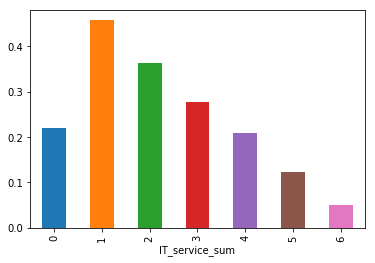

In [101]:
class_service_sum['Churn'].plot.bar()

In [102]:
# relationship (int)
# tenure ,MonthlyCharges, TotalCharges

In [103]:
# tenure

In [104]:
#int_column_names = ['tenure', 'MonthlyCharges', 'TotalCharges']

C:\Users\pioo0\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


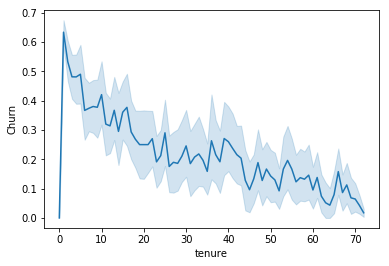

In [105]:
sns.lineplot(x=eg_df['tenure'], y=eg_df['Churn'])

In [107]:
# MonthlyCharges

In [108]:
print("minimum of monthlycharges :", eg_df['MonthlyCharges'].min())
print("maximum of monthlycharges :",eg_df['MonthlyCharges'].max())
print("mean of monthlycharges :",eg_df['MonthlyCharges'].mean())
print("median of monthlycharges :",eg_df['MonthlyCharges'].median())

minimum of monthlycharges : 18.25
maximum of monthlycharges : 118.75
mean of monthlycharges : 64.83429179978677
median of monthlycharges : 70.4


In [109]:
iv_monthly = pd.cut(eg_df["MonthlyCharges"], np.arange(10,130,10))
group_monthly_charges = eg_df.groupby(iv_monthly).mean()
group_monthly_charges

,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn,HaveFamily,IT_service_sum
MonthlyCharges,,,,,,,,,,,,
"(10, 20]",0.024621,26.327652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.592330,0.089015,0.511364,0.000000
"(20, 30]",0.061713,30.137280,0.011335,0.016373,0.008816,0.011335,0.000000,0.000000,22.766499,0.105793,0.562972,0.047859
"(30, 40]",0.133803,26.330986,0.401408,0.380282,0.281690,0.373239,0.161972,0.133803,35.126761,0.267606,0.492958,1.732394
"(40, 50]",0.125348,20.632312,0.270195,0.222841,0.233983,0.220056,0.214485,0.214485,45.976323,0.320334,0.428969,1.376045
"(50, 60]",0.087824,27.526946,0.435130,0.407186,0.345309,0.379242,0.295409,0.285429,54.741018,0.217565,0.497006,2.147705
"(60, 70]",0.117241,31.816092,0.498851,0.445977,0.406897,0.482759,0.312644,0.337931,65.918161,0.211494,0.542529,2.485057
"(70, 80]",0.211590,25.502695,0.297844,0.316712,0.312668,0.288410,0.288410,0.292453,75.164488,0.389488,0.446092,1.796496
"(80, 90]",0.231081,33.405405,0.328378,0.441892,0.448649,0.350000,0.504054,0.517568,84.848581,0.367568,0.552703,2.590541
"(90, 100]",0.267459,36.499257,0.307578,0.478455,0.487370,0.286776,0.762259,0.748886,94.940490,0.390788,0.576523,3.071322


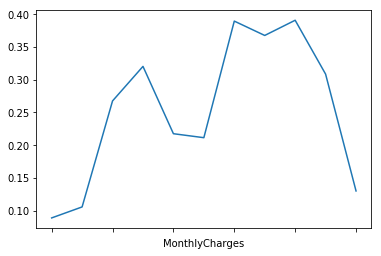

In [110]:
group_monthly_charges['Churn'].plot()

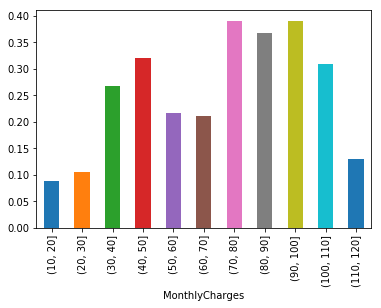

In [111]:
group_monthly_charges['Churn'].plot.bar()

In [112]:
# TotalCharges preprocessing

In [113]:
eg_df['TotalCharges'].head()

0     6155.4
1      672.7
2    1810.55
3    2405.05
4     4533.7
Name: TotalCharges, dtype: object

In [114]:
print((eg_df['TotalCharges'] == ' ').sum())

8


In [115]:
find = []
for i in range(0, len(eg_df['TotalCharges'])):
    if eg_df['TotalCharges'][i] == ' ':
        find.append(i)

find

[786, 1029, 1757, 2721, 3606, 4114, 4896, 5145]

In [116]:
display(eg_df.loc[find])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Family,HaveFamily,IT_service_sum
786,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,0,1,1,1,1,0,Two year,No,Mailed check,73.35,,0,YesYes,1.0,4
1029,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,1,0,1,1,1,0,Two year,Yes,Bank transfer (automatic),52.55,,0,YesYes,1.0,4
1757,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,0,0,0,0,0,0,Two year,No,Mailed check,25.35,,0,YesYes,1.0,0
2721,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,1,1,1,0,1,1,Two year,No,Mailed check,80.85,,0,YesYes,1.0,5
3606,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,1,1,0,1,0,0,Two year,Yes,Bank transfer (automatic),61.90,,0,NoYes,1.0,3
4114,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,1,1,1,1,1,0,Two year,No,Credit card (automatic),56.05,,0,YesYes,1.0,5
4896,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,0,0,0,0,0,0,Two year,No,Mailed check,20.25,,0,NoYes,1.0,0
5145,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,0,0,0,0,0,0,Two year,No,Mailed check,19.85,,0,YesYes,1.0,0


In [117]:
for i in find:
    eg_df['TotalCharges'][i] = eg_df['MonthlyCharges'][i]

C:\Users\pioo0\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [118]:
display(eg_df.loc[find])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Family,HaveFamily,IT_service_sum
786,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,0,1,1,1,1,0,Two year,No,Mailed check,73.35,73.35,0,YesYes,1.0,4
1029,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,1,0,1,1,1,0,Two year,Yes,Bank transfer (automatic),52.55,52.55,0,YesYes,1.0,4
1757,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,0,0,0,0,0,0,Two year,No,Mailed check,25.35,25.35,0,YesYes,1.0,0
2721,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,1,1,1,0,1,1,Two year,No,Mailed check,80.85,80.85,0,YesYes,1.0,5
3606,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,1,1,0,1,0,0,Two year,Yes,Bank transfer (automatic),61.90,61.9,0,NoYes,1.0,3
4114,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,1,1,1,1,1,0,Two year,No,Credit card (automatic),56.05,56.05,0,YesYes,1.0,5
4896,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,0,0,0,0,0,0,Two year,No,Mailed check,20.25,20.25,0,NoYes,1.0,0
5145,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,0,0,0,0,0,0,Two year,No,Mailed check,19.85,19.85,0,YesYes,1.0,0


In [119]:
eg_df["TotalCharges"].value_counts()

20.2       8
19.65      7
19.9       7
19.75      7
45.3       7
20.25      5
20.15      5
19.55      5
19.45      5
20.05      5
19.95      4
19.2       4
20.4       4
20.5       4
44.4       4
19.3       4
69.65      4
69.95      4
50.15      4
75.3       4
74.7       4
20.35      4
20.3       4
69.6       4
20.45      3
50.45      3
19.5       3
20.9       3
24.4       3
50.6       3
85.5       3
69.9       3
220.45     3
69.1       3
49.9       3
45.85      3
70.45      3
19.25      3
74.9       3
20         3
44         3
45.7       3
86.05      3
69.25      3
20.1       3
19.85      3
305.55     3
35.9       3
470.2      3
55.7       3
1284.2     3
50.75      3
70.6       3
25.25      3
70.15      3
84.5       3
91.7       2
288.05     2
3729.75    2
2651.2     2
1782       2
52         2
20.75      2
55         2
987.95     2
1008.7     2
45.95      2
1235.55    2
3187.65    2
70.05      2
2317.1     2
76.35      2
2497.2     2
449.75     2
3533.6     2
45.4       2
5682.25    2

In [120]:
eg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 24 columns):
customerID          5634 non-null object
gender              5634 non-null object
SeniorCitizen       5634 non-null int64
Partner             5634 non-null object
Dependents          5634 non-null object
tenure              5634 non-null int64
PhoneService        5634 non-null object
MultipleLines       5634 non-null object
InternetService     5634 non-null object
OnlineSecurity      5634 non-null int64
OnlineBackup        5634 non-null int64
DeviceProtection    5634 non-null int64
TechSupport         5634 non-null int64
StreamingTV         5634 non-null int64
StreamingMovies     5634 non-null int64
Contract            5634 non-null object
PaperlessBilling    5634 non-null object
PaymentMethod       5634 non-null object
MonthlyCharges      5634 non-null float64
TotalCharges        5634 non-null object
Churn               5634 non-null int64
Family              5634 non-null object

In [121]:
# TotalCharges preprocessing
eg_df["TotalCharges"] = eg_df.TotalCharges.astype(float)

In [122]:
eg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 24 columns):
customerID          5634 non-null object
gender              5634 non-null object
SeniorCitizen       5634 non-null int64
Partner             5634 non-null object
Dependents          5634 non-null object
tenure              5634 non-null int64
PhoneService        5634 non-null object
MultipleLines       5634 non-null object
InternetService     5634 non-null object
OnlineSecurity      5634 non-null int64
OnlineBackup        5634 non-null int64
DeviceProtection    5634 non-null int64
TechSupport         5634 non-null int64
StreamingTV         5634 non-null int64
StreamingMovies     5634 non-null int64
Contract            5634 non-null object
PaperlessBilling    5634 non-null object
PaymentMethod       5634 non-null object
MonthlyCharges      5634 non-null float64
TotalCharges        5634 non-null float64
Churn               5634 non-null int64
Family              5634 non-null objec

In [123]:
print("minimum of totalcharges :", eg_df['TotalCharges'].min())
print("maximum of totalcharges :",eg_df['TotalCharges'].max())
print("mean of totalcharges :",eg_df['TotalCharges'].mean())
print("median of totalcharges :",eg_df['TotalCharges'].median())

minimum of totalcharges : 18.85
maximum of totalcharges : 8684.8
mean of totalcharges : 2284.452635782749
median of totalcharges : 1395.525


In [124]:
corr_mat = eg_df.corr()
corr_mat

,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Churn,HaveFamily,IT_service_sum
SeniorCitizen,1.000000,0.024983,-0.034445,0.070700,0.059423,-0.056404,0.107668,0.121474,0.221910,0.109349,0.151184,-0.029044,0.071594
tenure,0.024983,1.000000,0.325698,0.371187,0.361910,0.335218,0.283905,0.293138,0.250329,0.828726,-0.362305,0.344531,0.501832
OnlineSecurity,-0.034445,0.325698,1.000000,0.283052,0.272006,0.351913,0.172354,0.185363,0.298690,0.410464,-0.169751,0.150008,0.567295
OnlineBackup,0.070700,0.371187,0.283052,1.000000,0.313419,0.295181,0.284318,0.284882,0.442945,0.517418,-0.102765,0.123344,0.628787
DeviceProtection,0.059423,0.361910,0.272006,0.313419,1.000000,0.332075,0.393766,0.402714,0.481746,0.520771,-0.070007,0.128671,0.694718
TechSupport,-0.056404,0.335218,0.351913,0.295181,0.332075,1.000000,0.281083,0.281172,0.336367,0.439601,-0.169681,0.117031,0.639443
StreamingTV,0.107668,0.283905,0.172354,0.284318,0.393766,0.281083,1.000000,0.538961,0.627089,0.513919,0.064169,0.098275,0.690275
StreamingMovies,0.121474,0.293138,0.185363,0.284882,0.402714,0.281172,0.538961,1.000000,0.627105,0.522057,0.049643,0.092229,0.695981
MonthlyCharges,0.221910,0.250329,0.298690,0.442945,0.481746,0.336367,0.627089,0.627105,1.000000,0.649700,0.190375,0.055008,0.723072
TotalCharges,0.109349,0.828726,0.410464,0.517418,0.520771,0.439601,0.513919,0.522057,0.649700,1.000000,-0.208888,0.274429,0.747305


In [125]:
iv_total = pd.cut(eg_df["TotalCharges"], np.arange(0,1500,50))
group_total_charges = eg_df.groupby(iv_total).mean()
#group_total_charges

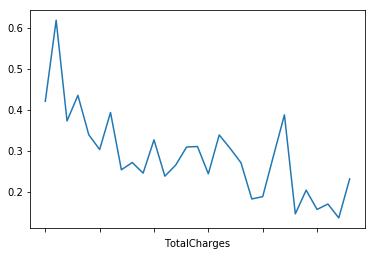

In [126]:
group_total_charges['Churn'].plot()

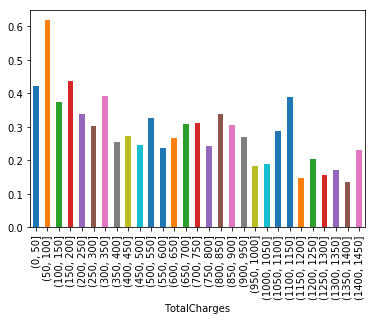

In [127]:
group_total_charges['Churn'].plot.bar()

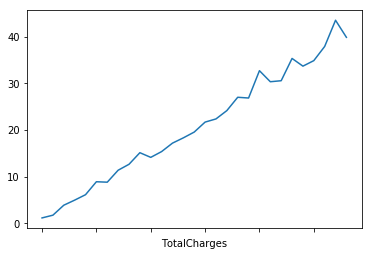

In [128]:
group_total_charges['tenure'].plot()

In [129]:
### PaperlessBilling - ['No' 'Yes']
### PaymentMethod - ['Mailed check' 'Electronic check' 'Bank transfer (automatic)' 'Credit card (automatic)']

# 연관성이 존재할것 같다.

In [130]:
print((eg_df['PaperlessBilling'] == 'Yes').sum())
print((eg_df['PaperlessBilling'] == 'No').sum())

3358
2276


In [131]:
values_count = eg_df.groupby('PaymentMethod').count()

In [132]:
values_count

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Family,HaveFamily,IT_service_sum
PaymentMethod,,,,,,,,,,,,,,,,,,,,,,,
Bank transfer (automatic),1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240
Credit card (automatic),1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194
Electronic check,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896
Mailed check,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304


In [133]:
# 둘다 수는 별차이 없다.

In [134]:
paper_payment = eg_df.groupby(['PaperlessBilling', 'PaymentMethod']).mean()
paper_payment

SeniorCitizen     tenure  \
PaperlessBilling PaymentMethod                                         
No               Bank transfer (automatic)       0.103774  44.037736   
                 Credit card (automatic)         0.101010  43.280808   
                 Electronic check                0.154959  23.289256   
                 Mailed check                    0.035202  22.082138   
Yes              Bank transfer (automatic)       0.191549  43.890141   
                 Credit card (automatic)         0.168813  43.324750   
                 Electronic check                0.286827  25.750000   
                 Mailed check                    0.087523  21.668529   

                                            OnlineSecurity  OnlineBackup  \
PaperlessBilling PaymentMethod                                             
No               Bank transfer (automatic)        0.362264      0.354717   
                 Credit card (automatic)          0.371717      0.343434   
                 Electronic check                 0.283058      0.311983   
                 Mailed check                     0.195567      0.146023   
Yes              Bank transfer (automatic)        0.356338      0.491549   
                 Credit card (automatic)          0.396280      0.483548   
                 Electronic check                 0.205382      0.356232   
                 Mailed check                     0.253259      0.260708   

                                            DeviceProtection  TechSupport  \
PaperlessBilling PaymentMethod                                              
No               Bank transfer (automatic)          0.347170     0.349057   
                 Credit card (automatic)            0.400000     0.369697   
                 Electronic check                   0.324380     0.225207   
                 Mailed check                       0.146023     0.173403   
Yes              Bank transfer (automatic)          0.476056     0.397183   
                 Credit card (automatic)            0.483548     0.403433   
                 Electronic check                   0.349150     0.203258   
                 Mailed check                       0.223464     0.277467   

                                            StreamingTV  StreamingMovies  \
PaperlessBilling PaymentMethod                                             
No               Bank transfer (automatic)     0.303774         0.294340   
                 Credit card (automatic)       0.311111         0.329293   
                 Electronic check              0.365702         0.371901   
                 Mailed check                  0.121252         0.118644   
Yes              Bank transfer (automatic)     0.533803         0.525352   
                 Credit card (automatic)       0.497854         0.500715   
                 Electronic check              0.538244         0.533286   
                 Mailed check                  0.210428         0.232775   

                                            MonthlyCharges  TotalCharges  \
PaperlessBilling PaymentMethod                                             
No               Bank transfer (automatic)       55.875943   2595.405660   
                 Credit card (automatic)         55.033333   2603.007778   
                 Electronic check                67.954752   1708.112707   
                 Mailed check                    37.276662    907.923859   
Yes              Bank transfer (automatic)       75.810563   3493.202042   
                 Credit card (automatic)         74.577182   3415.725250   
                 Electronic check                79.528718   2225.187323   
                 Mailed check                    53.426164   1254.596369   

                                               Churn  HaveFamily  \
PaperlessBilling PaymentMethod                                     
No               Bank transfer (automatic)  0.100000    0.637736   
                 Credit card (automatic)    0.086869    0.618182 

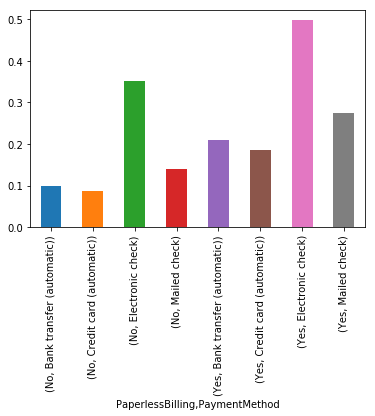

In [135]:
paper_payment['Churn'].plot.bar()

In [136]:
eg_df.info()

# SeniorCitizen, HaveFamily, tenure, PhoneService-ob, InternetService-ob, IT_serivce_sum, Contract-ob, PaperBilling-ob, PaymentMethod-0b
# MonthlyCharges, TotalCharges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 24 columns):
customerID          5634 non-null object
gender              5634 non-null object
SeniorCitizen       5634 non-null int64
Partner             5634 non-null object
Dependents          5634 non-null object
tenure              5634 non-null int64
PhoneService        5634 non-null object
MultipleLines       5634 non-null object
InternetService     5634 non-null object
OnlineSecurity      5634 non-null int64
OnlineBackup        5634 non-null int64
DeviceProtection    5634 non-null int64
TechSupport         5634 non-null int64
StreamingTV         5634 non-null int64
StreamingMovies     5634 non-null int64
Contract            5634 non-null object
PaperlessBilling    5634 non-null object
PaymentMethod       5634 non-null object
MonthlyCharges      5634 non-null float64
TotalCharges        5634 non-null float64
Churn               5634 non-null int64
Family              5634 non-null objec

In [137]:
### preprocessing other object features
# PhoneService-ob, InternetService-ob, Contract-ob, PaperBilling-ob, PaymentMethod-0b

In [138]:
le = preprocessing.LabelEncoder()

In [139]:
# PhoneService

In [140]:
eg_df.loc[eg_df['PhoneService'] == 'Yes', 'PhoneService'] = 1
eg_df.loc[eg_df['PhoneService'] == 'No', 'PhoneService'] = 0

In [141]:
eg_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Family,HaveFamily,IT_service_sum
0,9453-PATOS,Female,0,Yes,No,72,1,No,DSL,1,1,1,1,1,1,Two year,No,Mailed check,85.10,6155.40,0,YesNo,1.0,6
1,8648-PFRMP,Female,1,No,No,14,0,No phone service,DSL,0,0,0,0,1,1,Month-to-month,Yes,Electronic check,46.35,672.70,0,NoNo,0.0,2
2,7711-GQBZC,Female,0,Yes,Yes,71,1,Yes,No,0,0,0,0,0,0,Two year,No,Bank transfer (automatic),24.70,1810.55,0,YesYes,1.0,0
3,6289-CPNLD,Male,0,Yes,Yes,33,1,No,DSL,0,0,1,1,1,1,One year,Yes,Mailed check,73.90,2405.05,1,YesYes,1.0,4
4,6845-RGTYS,Female,0,Yes,No,47,1,Yes,Fiber optic,1,1,1,0,1,0,Month-to-month,Yes,Electronic check,98.75,4533.70,1,YesNo,1.0,4


In [142]:
# InternetService

In [143]:
eg_df.loc[eg_df['InternetService'] == 'Fiber optic', 'InternetService'] = 2
eg_df.loc[eg_df['InternetService'] == 'DSL', 'InternetService'] = 1
eg_df.loc[eg_df['InternetService'] == 'No', 'InternetService'] = 0

In [144]:
eg_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Family,HaveFamily,IT_service_sum
0,9453-PATOS,Female,0,Yes,No,72,1,No,1,1,1,1,1,1,1,Two year,No,Mailed check,85.10,6155.40,0,YesNo,1.0,6
1,8648-PFRMP,Female,1,No,No,14,0,No phone service,1,0,0,0,0,1,1,Month-to-month,Yes,Electronic check,46.35,672.70,0,NoNo,0.0,2
2,7711-GQBZC,Female,0,Yes,Yes,71,1,Yes,0,0,0,0,0,0,0,Two year,No,Bank transfer (automatic),24.70,1810.55,0,YesYes,1.0,0
3,6289-CPNLD,Male,0,Yes,Yes,33,1,No,1,0,0,1,1,1,1,One year,Yes,Mailed check,73.90,2405.05,1,YesYes,1.0,4
4,6845-RGTYS,Female,0,Yes,No,47,1,Yes,2,1,1,1,0,1,0,Month-to-month,Yes,Electronic check,98.75,4533.70,1,YesNo,1.0,4


In [145]:
# Contract

In [146]:
eg_df['Contract'].unique()

array(['Two year', 'Month-to-month', 'One year'], dtype=object)

In [147]:
eg_df.loc[eg_df['Contract'] == 'Two year', 'Contract'] = 2
eg_df.loc[eg_df['Contract'] == 'One year', 'Contract'] = 1
eg_df.loc[eg_df['Contract'] == 'Month-to-month', 'Contract'] = 0

In [148]:
eg_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Family,HaveFamily,IT_service_sum
0,9453-PATOS,Female,0,Yes,No,72,1,No,1,1,1,1,1,1,1,2,No,Mailed check,85.10,6155.40,0,YesNo,1.0,6
1,8648-PFRMP,Female,1,No,No,14,0,No phone service,1,0,0,0,0,1,1,0,Yes,Electronic check,46.35,672.70,0,NoNo,0.0,2
2,7711-GQBZC,Female,0,Yes,Yes,71,1,Yes,0,0,0,0,0,0,0,2,No,Bank transfer (automatic),24.70,1810.55,0,YesYes,1.0,0
3,6289-CPNLD,Male,0,Yes,Yes,33,1,No,1,0,0,1,1,1,1,1,Yes,Mailed check,73.90,2405.05,1,YesYes,1.0,4
4,6845-RGTYS,Female,0,Yes,No,47,1,Yes,2,1,1,1,0,1,0,0,Yes,Electronic check,98.75,4533.70,1,YesNo,1.0,4


In [149]:
# PaymentMethod

In [150]:
eg_df['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [151]:
eg_df.loc[eg_df['PaymentMethod'] == 'Electronic check', 'PaymentMethod'] = 3
eg_df.loc[eg_df['PaymentMethod'] == 'Mailed check', 'PaymentMethod'] = 2
eg_df.loc[eg_df['PaymentMethod'] == 'Bank transfer (automatic)', 'PaymentMethod'] = 1
eg_df.loc[eg_df['PaymentMethod'] == 'Credit card (automatic)', 'PaymentMethod'] = 0

In [152]:
# PaperlessBilling

In [153]:
eg_df.loc[eg_df['PaperlessBilling'] == 'Yes', 'PaperlessBilling'] = 1
eg_df.loc[eg_df['PaperlessBilling'] == 'No', 'PaperlessBilling'] = 0

In [154]:
eg_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Family,HaveFamily,IT_service_sum
0,9453-PATOS,Female,0,Yes,No,72,1,No,1,1,1,1,1,1,1,2,0,2,85.10,6155.40,0,YesNo,1.0,6
1,8648-PFRMP,Female,1,No,No,14,0,No phone service,1,0,0,0,0,1,1,0,1,3,46.35,672.70,0,NoNo,0.0,2
2,7711-GQBZC,Female,0,Yes,Yes,71,1,Yes,0,0,0,0,0,0,0,2,0,1,24.70,1810.55,0,YesYes,1.0,0
3,6289-CPNLD,Male,0,Yes,Yes,33,1,No,1,0,0,1,1,1,1,1,1,2,73.90,2405.05,1,YesYes,1.0,4
4,6845-RGTYS,Female,0,Yes,No,47,1,Yes,2,1,1,1,0,1,0,0,1,3,98.75,4533.70,1,YesNo,1.0,4


In [155]:
### drop features

In [156]:
eg_df = eg_df.drop(['customerID', 'gender', 'Partner', 'Dependents', 'MultipleLines','OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Family'],axis=1)
eg_df.head()

,SeniorCitizen,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HaveFamily,IT_service_sum
0,0,72,1,1,2,0,2,85.10,6155.40,0,1.0,6
1,1,14,0,1,0,1,3,46.35,672.70,0,0.0,2
2,0,71,1,0,2,0,1,24.70,1810.55,0,1.0,0
3,0,33,1,1,1,1,2,73.90,2405.05,1,1.0,4
4,0,47,1,2,0,1,3,98.75,4533.70,1,1.0,4


In [157]:
### Model fitting

In [158]:
from sklearn import cross_validation

X = eg_df.drop(['Churn'],axis=1).values
y = eg_df['Churn'].values

X_train, X_val, y_train, y_val = cross_validation.train_test_split(X,y,test_size=0.2)

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [159]:
# Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression()
logit_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [161]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'penalty': ["l1","l2"], 'C':[0.5,1.0,2.0,999.]} 
    # Inverse of regularization Strength -> 1/C
    ]

logit_reg = LogisticRegression()
lr_grid_search = GridSearchCV(logit_reg, param_grid, cv=5,
                          scoring="accuracy")

lr_grid_search.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': [0.5, 1.0, 2.0, 999.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [162]:
pd.DataFrame(lr_grid_search.cv_results_)

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.132066,0.013692,0.000982,0.000020,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",0.817376,0.807453,0.805679,0.795737,0.812611,0.807774,0.007279,3,0.805593,0.808964,0.810295,0.815661,0.809672,0.810037,0.003248
1,0.019955,0.001664,0.000983,0.000018,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.810284,0.805679,0.798580,0.791297,0.809947,0.803159,0.007277,7,0.803151,0.805636,0.804970,0.807232,0.805679,0.805333,0.001320
2,0.140033,0.015433,0.000792,0.000396,1,l1,"{'C': 1.0, 'penalty': 'l1'}",0.816489,0.807453,0.803017,0.796625,0.811723,0.807064,0.006871,4,0.805593,0.809408,0.810073,0.813886,0.810115,0.809815,0.002635
3,0.022540,0.001738,0.000598,0.000488,1,l2,"{'C': 1.0, 'penalty': 'l2'}",0.809397,0.806566,0.798580,0.791297,0.809947,0.803159,0.007186,7,0.802929,0.806079,0.804083,0.807675,0.805457,0.805245,0.001635
4,0.152197,0.012509,0.000790,0.000395,2,l1,"{'C': 2.0, 'penalty': 'l1'}",0.818262,0.807453,0.803904,0.798401,0.814387,0.808484,0.007130,2,0.805814,0.809629,0.810073,0.813886,0.810337,0.809948,0.002564
5,0.019351,0.001015,0.000790,0.000395,2,l2,"{'C': 2.0, 'penalty': 'l2'}",0.810284,0.806566,0.798580,0.792185,0.809059,0.803337,0.006905,6,0.802708,0.806079,0.804083,0.807675,0.804791,0.805067,0.001699
6,0.135839,0.027412,0.000791,0.000396,999,l1,"{'C': 999.0, 'penalty': 'l1'}",0.820035,0.807453,0.805679,0.798401,0.811723,0.808662,0.007133,1,0.805371,0.810073,0.810739,0.814108,0.808563,0.809771,0.002852
7,0.020151,0.001600,0.000591,0.000483,999,l2,"{'C': 999.0, 'penalty': 'l2'}",0.811170,0.809228,0.798580,0.792185,0.810835,0.804402,0.007662,5,0.802708,0.806079,0.804304,0.808119,0.804791,0.805200,0.001815


In [163]:
cvres = lr_grid_search.cv_results_
#cvres

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (lr_grid_search.best_params_)
print (lr_grid_search.best_score_)

0.8077742279020235 {'C': 0.5, 'penalty': 'l1'}
0.8031593894213702 {'C': 0.5, 'penalty': 'l2'}
0.8070642527511537 {'C': 1.0, 'penalty': 'l1'}
0.8031593894213702 {'C': 1.0, 'penalty': 'l2'}
0.8084842030528931 {'C': 2.0, 'penalty': 'l1'}
0.8033368832090877 {'C': 2.0, 'penalty': 'l2'}
0.8086616968406106 {'C': 999.0, 'penalty': 'l1'}
0.8044018459353922 {'C': 999.0, 'penalty': 'l2'}
{'C': 999.0, 'penalty': 'l1'}
0.8086616968406106


In [164]:
# SVM

In [165]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_clf_pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC())
])

param_grid = [
        {'svm_clf__kernel': ['linear'], 'svm_clf__C': [10., 100., 1000.,10000.]},
        {'svm_clf__kernel': ['rbf'], 'svm_clf__C': [1.0,10.,100.,1000.0],
         'svm_clf__gamma': [0.01,0.1,1.0,]},
    ]

svm_grid_search = GridSearchCV(svm_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

svm_grid_search.fit(X,y)

cvres = svm_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (svm_grid_search.best_params_)
print (svm_grid_search.best_score_)
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.svm import SVC\n\nsvm_clf_pipe = Pipeline([\n            ("scaler", StandardScaler()),\n            ("svm_clf", SVC())\n])\n\nparam_grid = [\n        {\'svm_clf__kernel\': [\'linear\'], \'svm_clf__C\': [10., 100., 1000.,10000.]},\n        {\'svm_clf__kernel\': [\'rbf\'], \'svm_clf__C\': [1.0,10.,100.,1000.0],\n         \'svm_clf__gamma\': [0.01,0.1,1.0,]},\n    ]\n\nsvm_grid_search = GridSearchCV(svm_clf_pipe, param_grid, cv=5,\n                          scoring="accuracy")\n\nsvm_grid_search.fit(X,y)\n\ncvres = svm_grid_search.cv_results_\n\nfor acc, params in zip(cvres["mean_test_score"], cvres["params"]):\n    print(acc, params)\n    \nprint (svm_grid_search.best_params_)\nprint (svm_grid_search.best_score_)\n'

In [166]:
# Decision Tree

In [167]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

dt_clf_pipe = Pipeline([
            #("scaler", StandardScaler()),
            ("tf_clf", clf_dt),
])

param_grid = [
        {'tf_clf__criterion': ['gini'], 'tf_clf__max_depth' : [2,3,4,5]},
        {'tf_clf__criterion': ['entropy'], 'tf_clf__max_depth' : [2,3,4,5]},
    ]

dt_grid_search = GridSearchCV(dt_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

dt_grid_search.fit(X,y)

cvres = dt_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (dt_grid_search.best_params_)
print (dt_grid_search.best_score_)

0.763400780972666 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 2}
0.7912673056443025 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 3}
0.7919772807951722 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 4}
0.7855875044373447 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 5}
0.763400780972666 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 2}
0.792332268370607 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 3}
0.7930422435214768 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 4}
0.7875399361022364 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 5}
{'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 4}
0.7930422435214768


In [169]:
# random forest

In [170]:
from sklearn.ensemble import RandomForestClassifier


clf_rf = RandomForestClassifier()
clf_rf

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

rf_clf_pipe = Pipeline([
            #("scaler", StandardScaler()),
            ("rf_clf", clf_rf),
])

param_grid = [
        {'rf_clf__n_estimators': [10,50,100,500], 
         'rf_clf__criterion': ["gini","entropy"], 
         'rf_clf__min_samples_split': [2,3,4,5]}
    ]

rf_grid_search = GridSearchCV(rf_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

rf_grid_search.fit(X,y)

cvres = rf_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (rf_grid_search.best_params_)
print (rf_grid_search.best_score_)

0.7807951721689741 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 10}
0.7896698615548455 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 50}
0.7862974795882144 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 100}
0.7875399361022364 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 500}
0.7754703585374512 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 10}
0.7864749733759319 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 50}
0.7827476038338658 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 100}
0.7880724174653887 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 500}
0.7838125665601704 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 4, 'rf_clf__n_estimators': 10}
0.7878949236776

In [172]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [173]:
xg_model = XGBClassifier(booster='gbtree',seed = 42)
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

xg_clf_pipe = Pipeline([
            #("scaler", StandardScaler()),
            ("xg_clf", xg_model),
])

param_grid = [
        {'xg_clf__base_score': [0.5,0.55,0.6,0.65,0.7], 
         'xg_clf__max_depth': [2,3,4], 
         'xg_clf__n_estimators' : [10,50,70,100]},
    ]

xg_grid_search = GridSearchCV(xg_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

xg_grid_search.fit(X,y)

cvres = xg_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)

print (xg_grid_search.best_params_)
print (xg_grid_search.best_score_)

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

0.7916222932197373 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 10}
0.8008519701810437 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 50}
0.8024494142705005 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 70}
0.802626908058218 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 100}
0.793574724884629 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 10}
0.80386936457224 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 50}
0.8049343272985445 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 70}
0.80386936457224 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 100}
0.7969471068512602 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 4, 'xg_clf__n_estimators': 10}
0.8013844515441959 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 4, 'xg_clf__n_estimators': 50}
0.800851970181

In [211]:
lr_best_model = lr_grid_search.best_estimator_
#svm_best_model= svm_grid_search.best_estimator_
dt_best_model = dt_grid_search.best_estimator_
rf_best_model = rf_grid_search.best_estimator_
#gb_best_model = gb_grid_search.best_estimator_
xg_best_model = xg_grid_search.best_estimator_

from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier([('lr', lr_best_model),
                         ('dt', dt_best_model),
                         ('rf', rf_best_model),
                         ('xg', xg_best_model),
                        ], voting = 'soft')

eclf.fit(X,y)
eclf.score(X,y)

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8556975505857295

In [ ]:
### predict

In [176]:
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6296-DDOOR,Female,0,No,No,19,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25,No
1,3680-CTHUH,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.5,No
2,4931-TRZWN,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85,No
3,8559-WNQZS,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45,No
4,3537-HPKQT,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.4,No


In [177]:
latent_y = test_df[['Churn']]
test_df = test_df.drop(['Churn'],axis=1)

In [178]:
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,6296-DDOOR,Female,0,No,No,19,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25
1,3680-CTHUH,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.5
2,4931-TRZWN,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85
3,8559-WNQZS,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45
4,3537-HPKQT,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.4


In [179]:
### test data preprocessing

In [180]:
### IT_service_sum

In [181]:
service_cot = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [182]:
for name in service_cot:
    test_df.loc[test_df[name] == 'Yes', name] = 1
    test_df.loc[test_df[name] == 'No', name] = 0
    test_df.loc[test_df[name] == 'No internet service', name] = 0

In [183]:
test_df['IT_service_sum'] = test_df['OnlineBackup'] + test_df['OnlineSecurity'] + test_df['DeviceProtection'] + test_df['TechSupport'] + test_df['StreamingTV'] + test_df['StreamingMovies']

In [184]:
### Family

In [185]:
test_df['Family'] = test_df['Partner'] + test_df['Dependents']

In [186]:
test_df.loc[test_df["Family"].str.contains('NoNo',regex=True,na=False),"HaveFamily"] = 0
test_df["HaveFamily"].fillna(1, inplace=True)

In [187]:
# TotalCharges preprocessing

In [188]:
find = []
for i in range(0, len(test_df['TotalCharges'])):
    if test_df['TotalCharges'][i] == ' ':
        find.append(i)

find

[212, 404, 1039]

In [189]:
for i in find:
    test_df['TotalCharges'][i] = test_df['MonthlyCharges'][i]

C:\Users\pioo0\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [190]:
# Object

In [191]:
test_df.loc[test_df['PhoneService'] == 'Yes', 'PhoneService'] = 1
test_df.loc[test_df['PhoneService'] == 'No', 'PhoneService'] = 0

In [192]:
test_df.loc[test_df['InternetService'] == 'Fiber optic', 'InternetService'] = 2
test_df.loc[test_df['InternetService'] == 'DSL', 'InternetService'] = 1
test_df.loc[test_df['InternetService'] == 'No', 'InternetService'] = 0

In [193]:
test_df.loc[test_df['Contract'] == 'Two year', 'Contract'] = 2
test_df.loc[test_df['Contract'] == 'One year', 'Contract'] = 1
test_df.loc[test_df['Contract'] == 'Month-to-month', 'Contract'] = 0

In [194]:
test_df.loc[test_df['PaymentMethod'] == 'Electronic check', 'PaymentMethod'] = 3
test_df.loc[test_df['PaymentMethod'] == 'Mailed check', 'PaymentMethod'] = 2
test_df.loc[test_df['PaymentMethod'] == 'Bank transfer (automatic)', 'PaymentMethod'] = 1
test_df.loc[test_df['PaymentMethod'] == 'Credit card (automatic)', 'PaymentMethod'] = 0

In [195]:
test_df.loc[test_df['PaperlessBilling'] == 'Yes', 'PaperlessBilling'] = 1
test_df.loc[test_df['PaperlessBilling'] == 'No', 'PaperlessBilling'] = 0

In [196]:
test_df = test_df.drop(['customerID', 'gender', 'Partner', 'Dependents', 'MultipleLines','OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Family'],axis=1)
test_df.head()

,SeniorCitizen,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,IT_service_sum,HaveFamily
0,0,19,1,1,1,0,3,58.20,1045.25,2,0.0
1,0,60,1,2,1,1,0,116.60,7049.5,6,0.0
2,0,13,1,1,0,1,3,71.95,923.85,3,0.0
3,0,1,1,0,2,0,2,20.45,20.45,0,0.0
4,0,55,1,2,0,1,0,77.75,4266.4,1,1.0


In [197]:
latent_y.head()

,Churn
0,No
1,No
2,No
3,No
4,No


In [198]:
latent_y['Churn'] = le.fit_transform(latent_y['Churn'])

In [199]:
latent_y.head()

,Churn
0,0
1,0
2,0
3,0
4,0


In [213]:
pred_eclf = eclf.predict(test_df.values)

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [214]:
eclf.score(test_df.values, latent_y)

C:\Users\pioo0\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7799858055358411

In [215]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(latent_y, pred_eclf))

[[897 144]
 [166 202]]


In [216]:
from sklearn.metrics import classification_report
print(classification_report(latent_y, pred_eclf, 
                            target_names=["not 9", "9"]))

             precision    recall  f1-score   support

      not 9       0.84      0.86      0.85      1041
          9       0.58      0.55      0.57       368

avg / total       0.78      0.78      0.78      1409



In [217]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [218]:
roc_auc_score(latent_y, eclf.predict_proba(test_df.values)[:,1])

0.8287834648957942